In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


### Target Column : Chances of Admit ; 0,1 

In [3]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [11]:
df['Chance of Admit'].value_counts(normalize=True)*100


0    55.0
1    45.0
Name: Chance of Admit, dtype: float64

<Axes: >

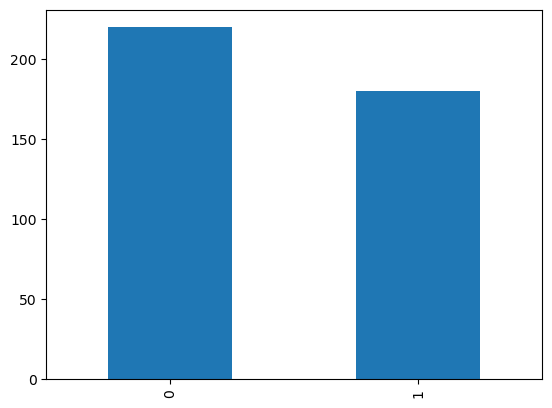

In [12]:
df['Chance of Admit'].value_counts().plot(kind='bar')

### Balanced Target Variable 55% - 45 % distribution ...no need to do sampling of classes

### Data Visualization

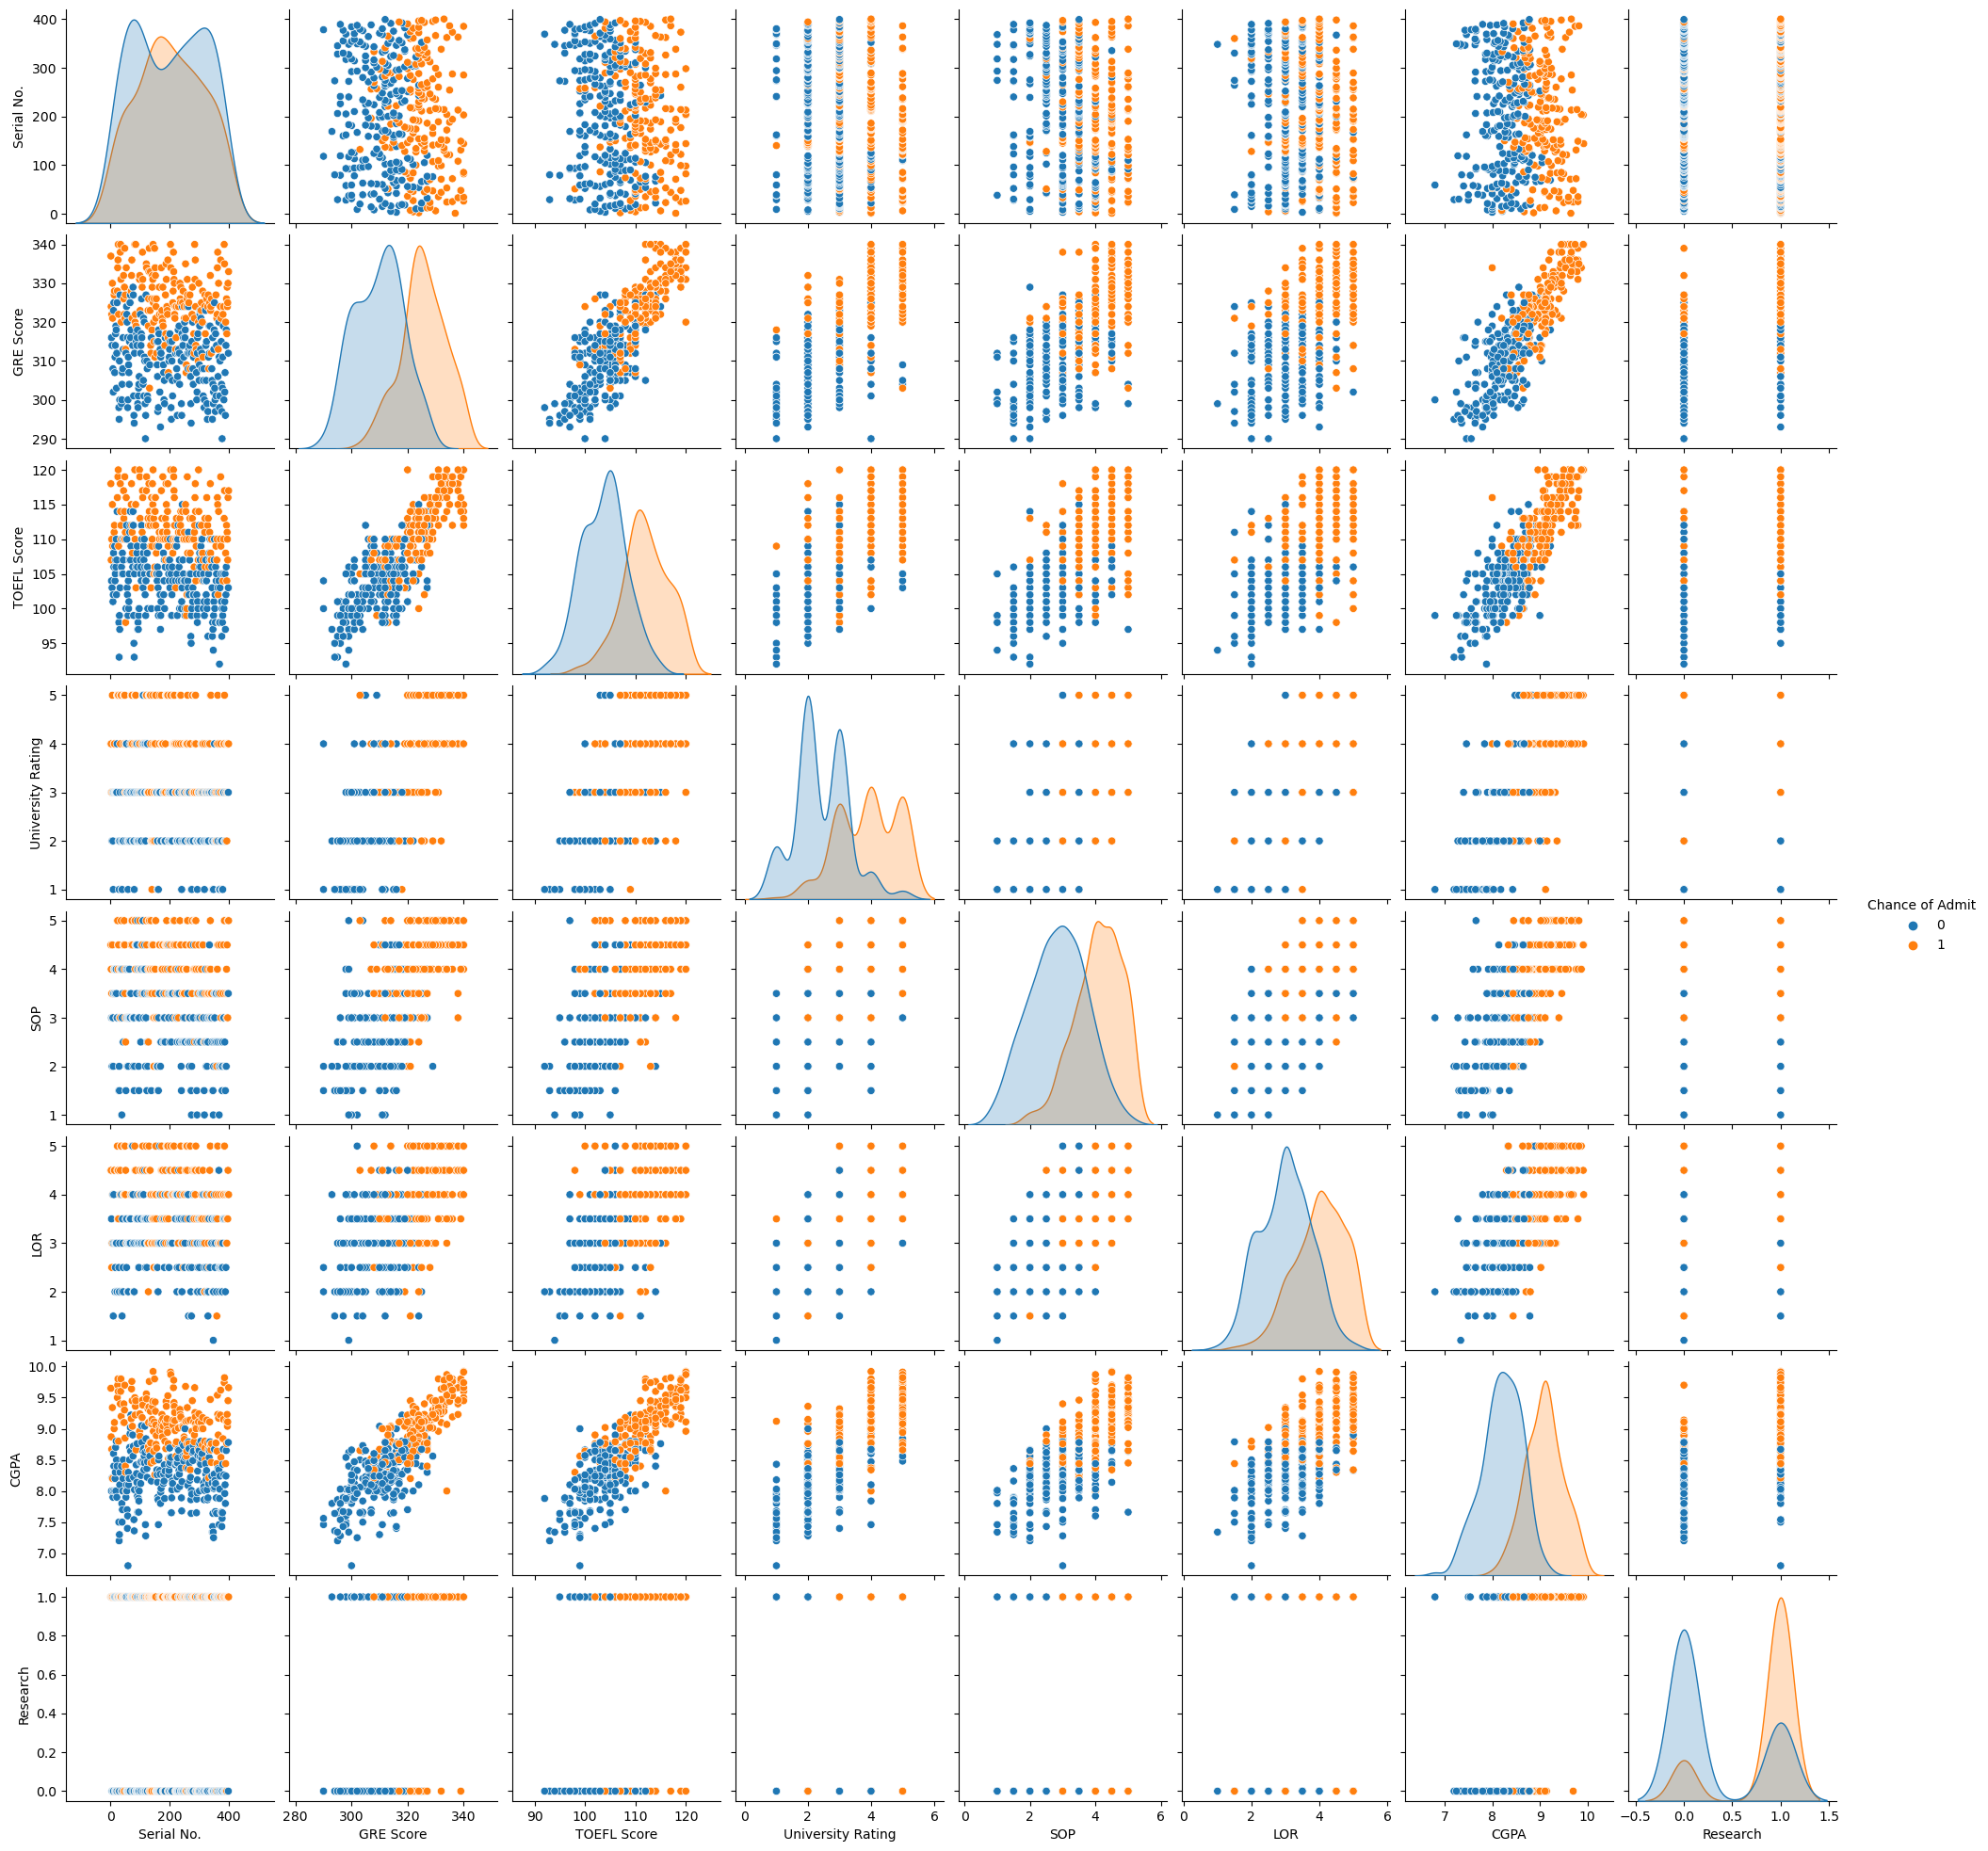

In [15]:
sns.pairplot(df,hue='Chance of Admit')

<Axes: >

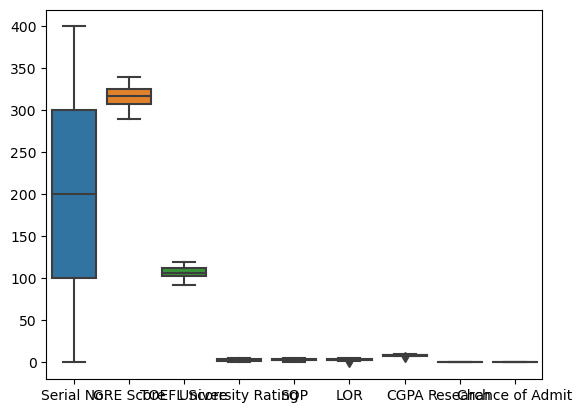

In [16]:
sns.boxplot(df)

<Axes: >

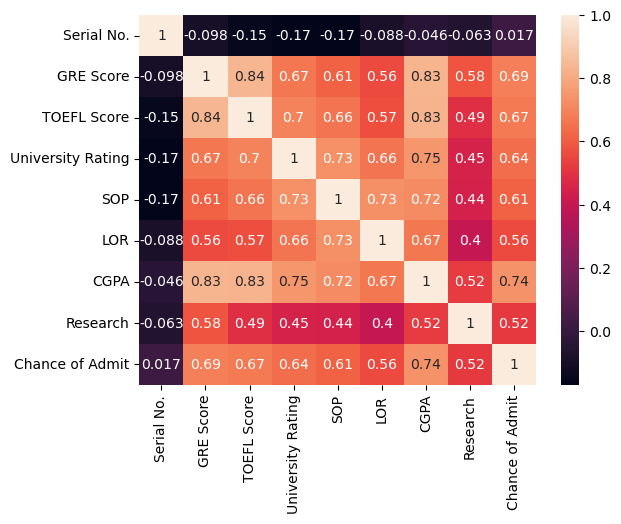

In [17]:
sns.heatmap(df.corr(), annot=True)

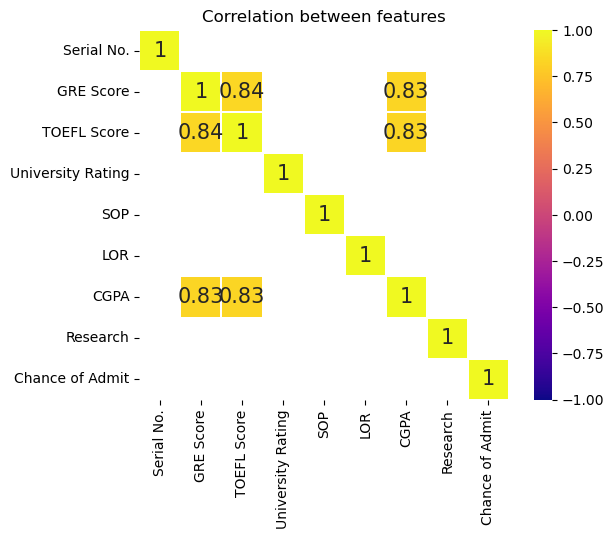

In [18]:
sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

### Null Value Treatment

In [19]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Oulier Treatment

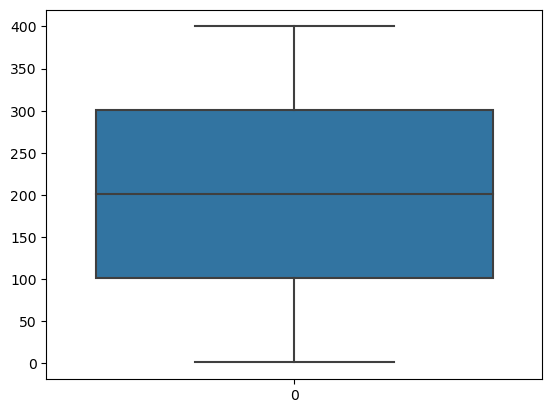

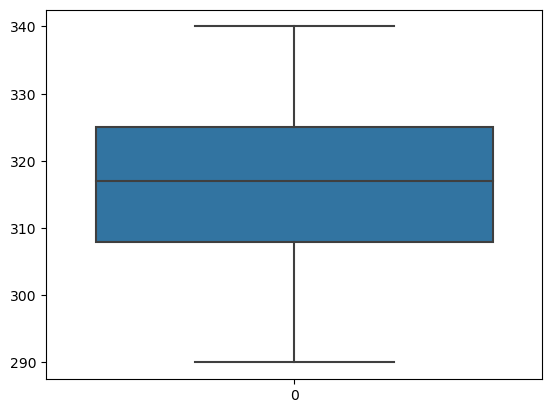

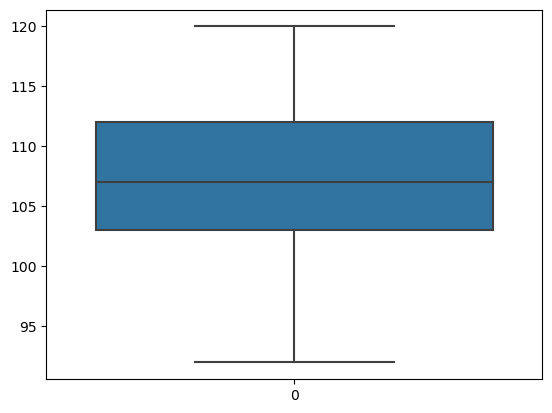

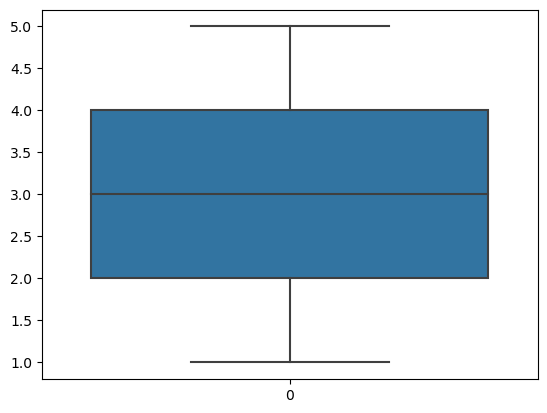

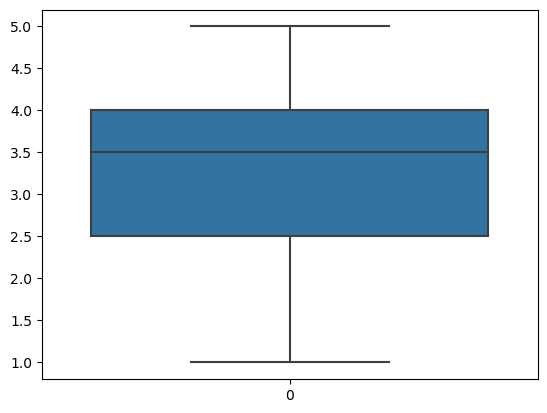

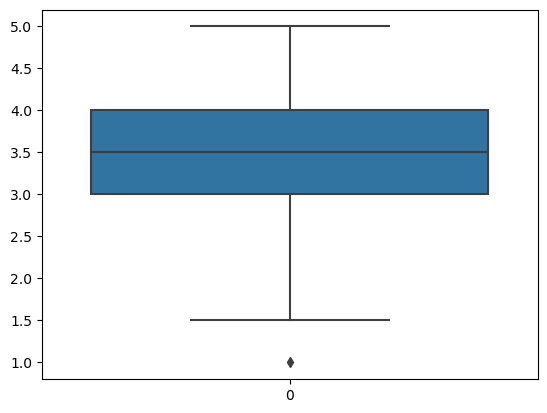

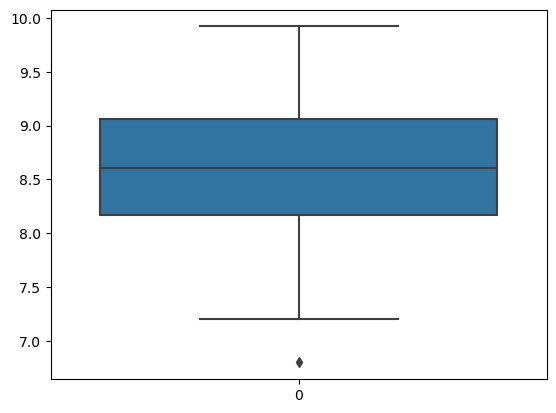

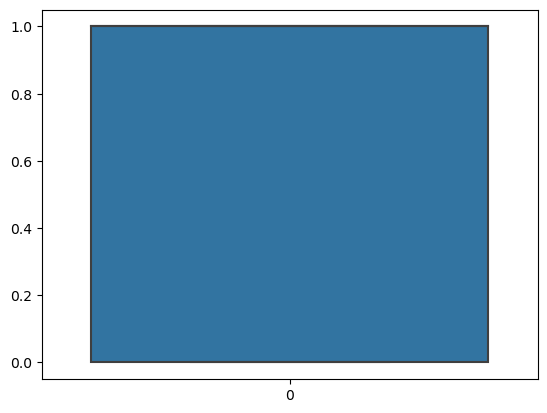

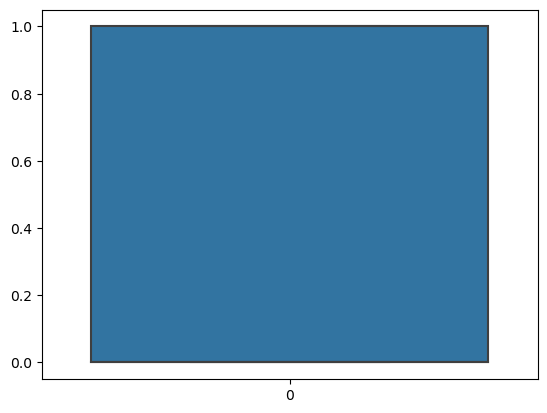

In [21]:
for i in df.select_dtypes(exclude='object').columns:
    sns.boxplot(df[i])
    plt.show()

### Treating Multicollinearity

In [24]:
df.drop(['TOEFL Score','CGPA'], axis=1, inplace=True)

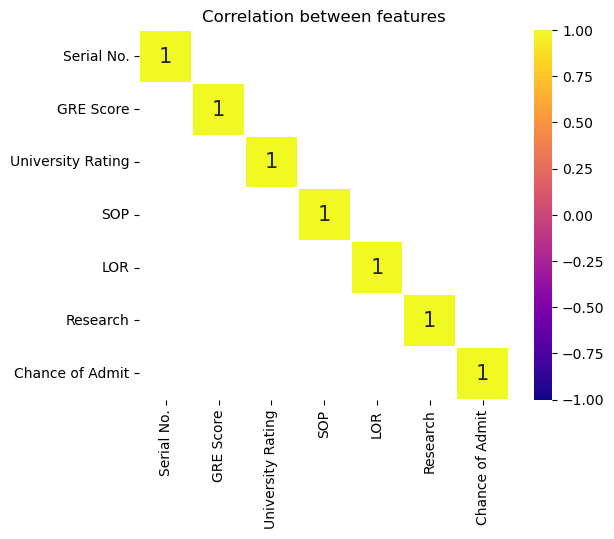

In [25]:
sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

### Checking Duplicates

In [36]:
df[df.duplicated()]

,Serial No.,GRE Score,University Rating,SOP,LOR,Research,Chance of Admit


### Encoding : Not required

### Scaling (except Target Column)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [30]:
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [31]:
X

,Serial No.,GRE Score,University Rating,SOP,LOR,Research
0,-1.727726,1.762107,0.798829,1.093864,1.167321,0.909112
1,-1.719066,0.627656,0.798829,0.596653,1.167321,0.909112
2,-1.710406,-0.070467,-0.076600,-0.397769,0.052933,0.909112
3,-1.701745,0.453126,-0.076600,0.099442,-1.061454,0.909112
4,-1.693085,-0.244998,-0.952029,-1.392191,-0.504260,-1.099975
...,...,...,...,...,...,...
395,1.693085,0.627656,-0.076600,0.099442,0.052933,0.909112
396,1.701745,0.714922,-0.076600,-0.397769,0.052933,0.909112
397,1.710406,1.151249,0.798829,1.591075,1.167321,0.909112
398,1.719066,-0.419528,-0.076600,0.099442,0.610127,-1.099975


### Train test split and builing Logit model as base model

In [32]:
import statsmodels
import statsmodels.api as sm
X = sm.add_constant(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [34]:
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.283141
         Iterations 8


In [35]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                  0.5890
Time:                        21:30:36   Log-Likelihood:                -79.279
converged:                       True   LL-Null:                       -192.87
Covariance Type:            nonrobust   LLR p-value:                 3.052e-46
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6083      0.215     -2.823      0.005      -1.031      -0.186
Serial No.            0.7444      0.233      3.189      0.001       0.287       1.202
GRE Score             2.3083      0.415      5.559      0.000       1.495       3.122
University Rating     0.5940      0.356      1.670      0.095      -0.103       1.291
SOP                   1.0538      0.401      2.630      0.009       0.268       1.839
LOR                   0.3938      0.326      1.207      0.227      -0.246       1.033
Research             -0.0077      0.228     -0.034      0.973      -0.455       0.440
=====================================================================================
"""

In [37]:
logit_model.params

const               -0.608346
Serial No.           0.744447
GRE Score            2.308341
University Rating    0.593956
SOP                  1.053797
LOR                  0.393753
Research            -0.007657
dtype: float64

### Model building

In [38]:
X_train.drop('const', axis=1, inplace=True)
X_test.drop('const', axis=1, inplace=True)

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred_LR = LR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        67
           1       0.91      0.77      0.84        53

    accuracy                           0.87       120
   macro avg       0.88      0.86      0.86       120
weighted avg       0.87      0.87      0.86       120



In [42]:
y_pred_LR = LR.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       153
           1       0.87      0.84      0.86       127

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.87      0.87      0.87       280



In [43]:
def performance(y,X,model):
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print("AUC score:", roc_auc_score(y,ypred_prob))
    print( "f1_score:",f1_score(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       153
           1       0.87      0.84      0.86       127

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.87      0.87      0.87       280

AUC score: 0.9487931655601873
f1_score: 0.8559999999999999


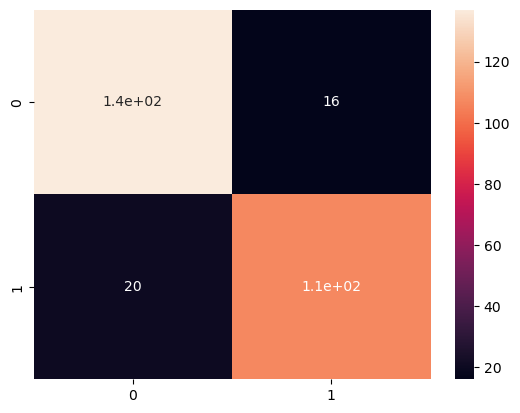

In [45]:
performance(y_train,X_train, LR)

#### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       127

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

AUC score: 1.0
f1_score: 1.0


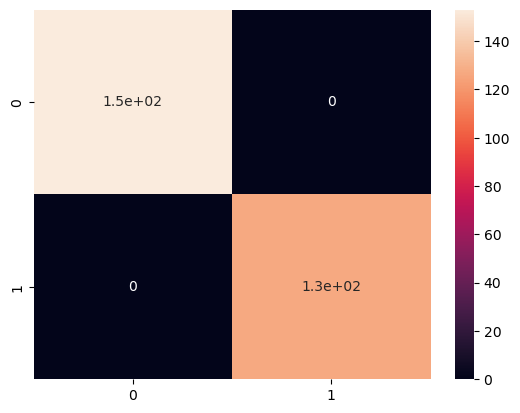

In [47]:
performance(y_train, X_train, DT)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        67
           1       0.77      0.77      0.77        53

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

AUC score: 0.7972402140242185
f1_score: 0.7735849056603775


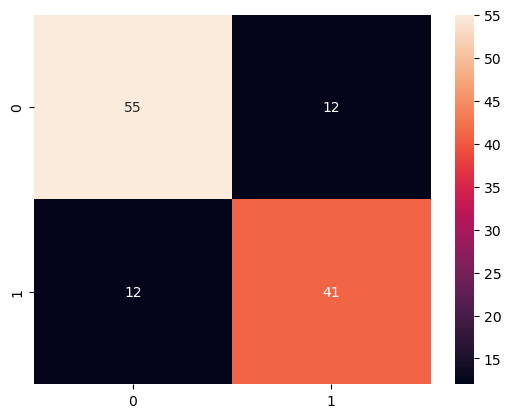

In [48]:
performance(y_test, X_test, DT)

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       127

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

AUC score: 1.0
f1_score: 1.0


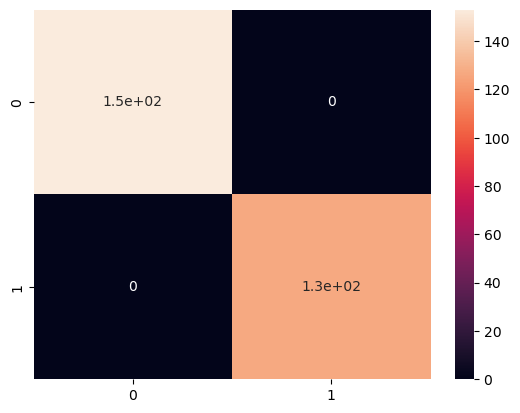

In [57]:
performance(y_train, X_train, rf)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        67
           1       0.88      0.79      0.83        53

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120

AUC score: 0.9272036046184173
f1_score: 0.8316831683168316


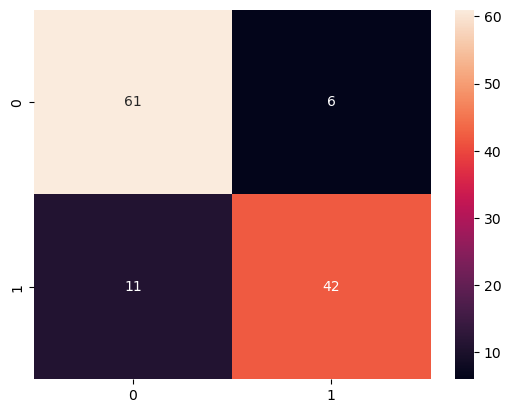

In [58]:
performance(y_test, X_test, rf)

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       153
           1       0.84      0.84      0.84       127

    accuracy                           0.85       280
   macro avg       0.85      0.85      0.85       280
weighted avg       0.85      0.85      0.85       280

AUC score: 0.9338685605475786
f1_score: 0.8392156862745098


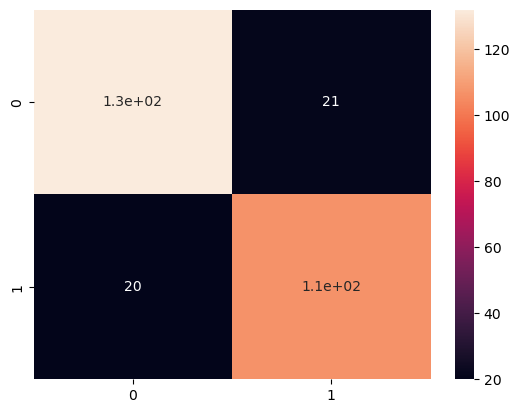

In [60]:
performance(y_train, X_train, gnb)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        67
           1       0.93      0.79      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.88      0.88       120

AUC score: 0.9507181075753308
f1_score: 0.8571428571428572


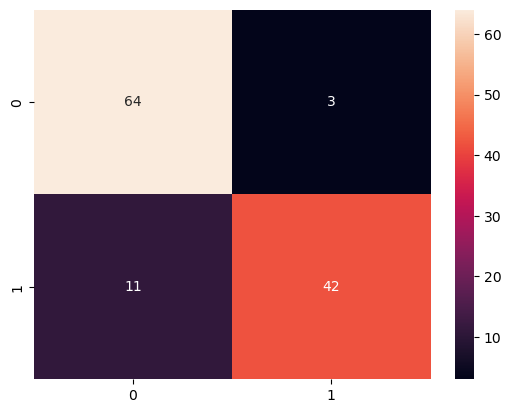

In [61]:
performance(y_test, X_test, gnb)

### Selecting the best Model and best features

In [66]:
from sklearn.feature_selection import RFE
rfe = RFE(LR,n_features_to_select=3)
X_selected = rfe.fit_transform(X, y) 

selected_indices = rfe.get_support(indices=True)


In [67]:
selected_feature_names = [X.columns[i] for i in selected_indices]

# Print the names of selected features
print("Selected feature names:", selected_feature_names)


Selected feature names: ['GRE Score', 'University Rating', 'SOP']


### Important Features from Decision tree model

In [69]:
imp=DT.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

,column,importance
1,GRE Score,0.556244
0,Serial No.,0.200682
3,SOP,0.107064
4,LOR,0.104060
5,Research,0.019213
2,University Rating,0.012736


<Axes: xlabel='importance', ylabel='column'>

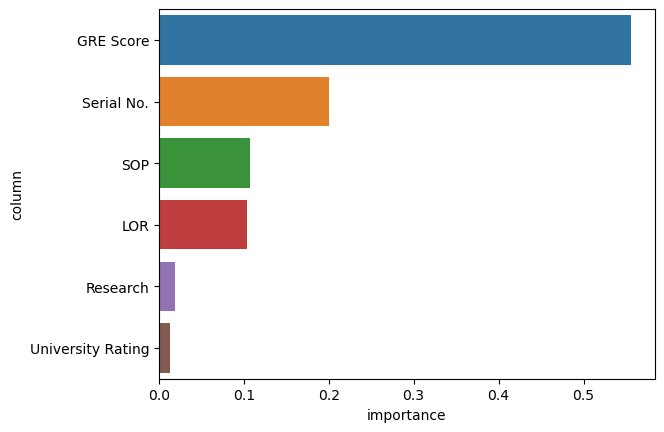

In [70]:
sns.barplot(y = 'column', x='importance', data = df_imp )

### Similary we can try out different models such as Xgboost, adaboost, gradientboosting, Voting classifier, KNN, GNB  and try Grid Search CV on some models to see if gives better results